https://medium.com/data-breach/introduction-to-sift-scale-invariant-feature-transform-65d7f3a72d40

# Feature Detection
Feature detection and descriptor extraction algorithms in OpenCV are as follows:
1. **Harris**: This algorithm is useful for detecting corners.
2. **SIFT**: This algorithm is useful for detecting blobs.
3. **SURF**: This algorithm is useful for detecting blobs.
4. **FAST**: This algorithm is useful for detecting corners.
5. **BRIEF**: This algorithm is useful for detecting blobs.
6. **ORB**: This algorithm stands for Oriented FAST and Rotated BRIEF. It is useful for detecting a combination of corners and blobs.


## What is bolbs?
 A blob (a region of an image that greatly differs from its surrounding areas)

## Outputs
1. **keypoints**
2. **detectors**

## Major advantages of SIFT
1. **Locality**: features are local, so robust to occlusion and clutter (no prior segmentation)
2. **Distinctiveness**: individual features can be matched to a large database of objects
3. **Quantity**: many features can be generated for even small objects
4. **Efficiency**: close to real-time performance
5. **Extensibility**: can easily be extended to a wide range of different feature types, with each adding robustness

## Algorithm
1. **Scale-space peak selection**: Potential location for finding features.
2. **Keypoint Localization**: Accurately locating the feature keypoints.
3. **Orientation Assignment**: Assigning orientation to keypoints.
4. **Keypoint descriptor**: Describing the keypoints as a high dimensional vector.
5. **Keypoint Matching**

## Scale-space peak selection
Real world objects are meaningful only at a certain scale
The idea was to blur an image progressively, shrink it, blur the small image progressively and so on. Now we use those blurred images to generate another set of images, the Difference of Gaussians (DoG). These DoG images are a great for finding out interesting key points in the image.
### Blurring
The scale space of an image is a function L(x,y,σ) that is produced from the convolution of a Gaussian kernel(Blurring) at different scales with the input image. 
**Benefits of blurring: it takes out the noises**
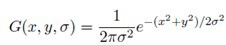

### DoG
You take an image, and blur it a little. And then, you calculate second order derivatives on it (or, the "laplacian"). This locates edges and corners on the image. These edges and corners are good for finding keypoints.(LoG approximations)\
However second derivatives is computationally intensive so we use DoG instead to cheat on calculating second derivatives
Difference of Gaussians (DoG). These DoG images are great for finding out interesting keypoints in the image. The difference of Gaussian is obtained as the difference of Gaussian blurring of an image with two different σ, let it be σ and kσ. 
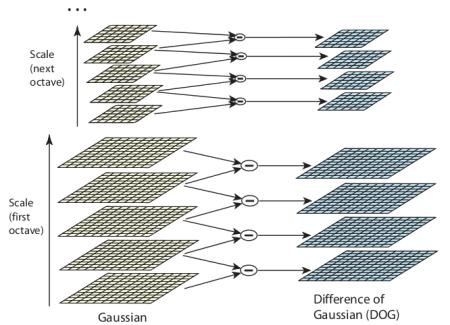
**Benefits**: scale invariant ( Laplacian of Gaussian images is not)
After doing this steps which is similar to find a second derivatives we are goint to find keypoints by finding local extrema.
One pixel in an image is compared with its 8 neighbors as well as 9 pixels in the next scale and 9 pixels in previous scales. This way, a total of 26 checks are made. If it is a local extrema, it is a potential keypoint. It basically means that keypoint is best represented in that scale.
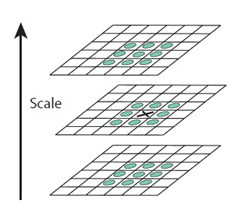

## Keypoint Localization
By proceeding previous steps, it produces unimportant potential keypoints which are:
<ol>
<li>along an edge</li>
<li>they don’t have enough contrast.</li>
</ol>
To remove these, the approach is similar to the one used in the Harris Corner Detector for removing edge features. 

1. **don't have enough contrast**: They used Taylor series expansion of scale space to get a more accurate location of extrema, and if the intensity at this extrema is less than a threshold value (0.03 as per the paper), it is rejected. 
2. **removing edges**: DoG has a higher response for edges, so edges also need to be removed. They used a 2x2 Hessian matrix (H) to compute the principal curvature.
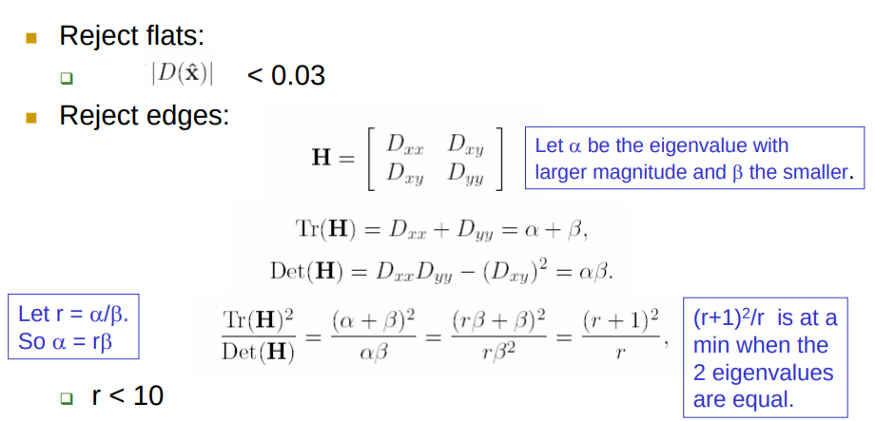


#### Now we have legimate keypoints

## Orientation Assignment